In [1]:
from keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
import numpy as np
from keras.layers import Dense, Flatten , Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import warnings

In [2]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [3]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)  
X_test = X_test.reshape(10000, 784)
print(X_train.shape,X_test.shape)

(60000, 784) (10000, 784)


In [5]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

#Fit and Transform training dataset
X_train = minmax.fit_transform(X_train)

#Transform testing dataset
X_test = minmax.transform(X_test)

#Display number of unique classes
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


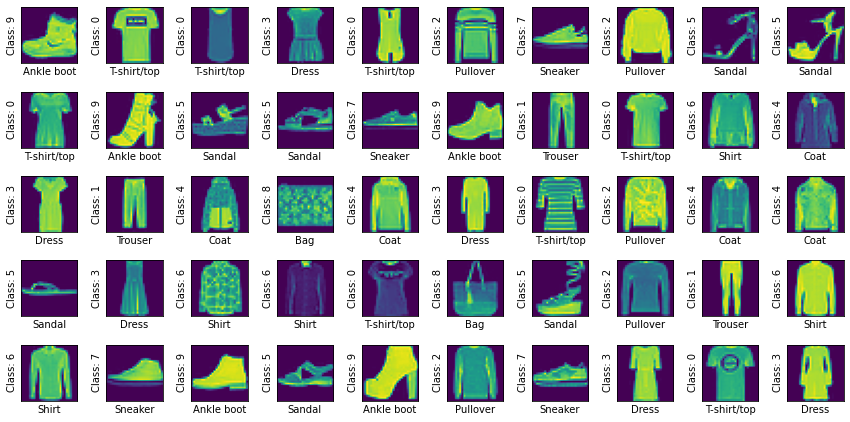

In [6]:
#Reshaping the dataset
X_train_fig = X_train.reshape(-1,28,28)
X_test_fig = X_test.reshape(-1,28,28)

#Names of clothing accessories in order 
Class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
       
#Visualizing first 50 images from the data
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_fig[i])
    plt.xlabel(Class_names[y_train[i]])
    plt.ylabel('Class: ' + str(y_train[i]))   
plt.subplots_adjust(hspace=0.5)  
plt.show()

In [7]:
X_train.shape

(60000, 784)

In [8]:
'''#Build the Architecture
model=Sequential()
model.add(Flatten(input_shape=(28,28))) # flattening the image of pixel 28x28
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(10,activation='softmax')) # this should be 10 as output - 0 to 9 digits
'''

"#Build the Architecture\nmodel=Sequential()\nmodel.add(Flatten(input_shape=(28,28))) # flattening the image of pixel 28x28\nmodel.add(Dense(8,activation='sigmoid'))\nmodel.add(Dense(10,activation='softmax')) # this should be 10 as output - 0 to 9 digits\n"

In [9]:
#initializing ANN model
model = Sequential()
#add 1st hidden layer
model.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
model.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
#compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [10]:
#fit training dataset into the model
res = model.fit(X_train, y_train, epochs=35,validation_data=(X_test,y_test))

Epoch 1/35
1875/1875 [==============================] - 1s 769us/step - loss: 0.4976 - accuracy: 0.8224 - val_loss: 0.4094 - val_accuracy: 0.8501
Epoch 2/35
1875/1875 [==============================] - 1s 704us/step - loss: 0.3628 - accuracy: 0.8682 - val_loss: 0.3991 - val_accuracy: 0.8571
Epoch 3/35
1875/1875 [==============================] - 1s 701us/step - loss: 0.3269 - accuracy: 0.8799 - val_loss: 0.3870 - val_accuracy: 0.8578
Epoch 4/35
1875/1875 [==============================] - 1s 669us/step - loss: 0.3023 - accuracy: 0.8886 - val_loss: 0.3595 - val_accuracy: 0.8725
Epoch 5/35
1875/1875 [==============================] - 1s 748us/step - loss: 0.2871 - accuracy: 0.8947 - val_loss: 0.3558 - val_accuracy: 0.8757
Epoch 6/35
1875/1875 [==============================] - 1s 737us/step - loss: 0.2708 - accuracy: 0.8996 - val_loss: 0.3438 - val_accuracy: 0.8819
Epoch 7/35
1875/1875 [==============================] - 1s 688us/step - loss: 0.2604 - accuracy: 0.9030 - val_loss: 0.3357 -

In [11]:
from matplotlib import style
style.use('ggplot')

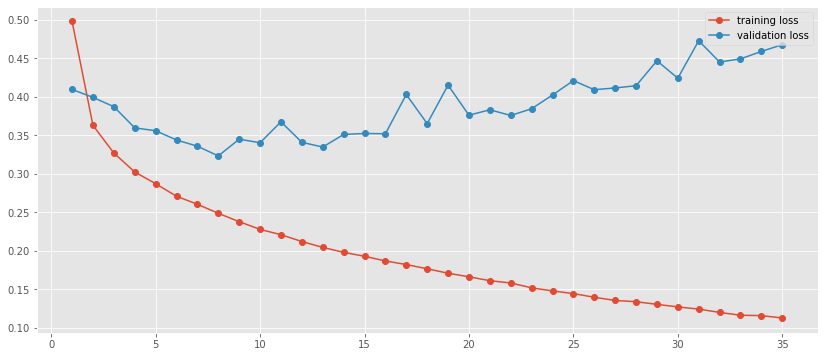

In [12]:
#training and validation loss as per the each ephoce
plt.figure(figsize=(14,6))
plt.plot(range(1,36),res.history['loss'],marker='o',label='training loss')
plt.plot(range(1,36),res.history['val_loss'],marker='o',label='validation loss')
plt.legend()
plt.show()

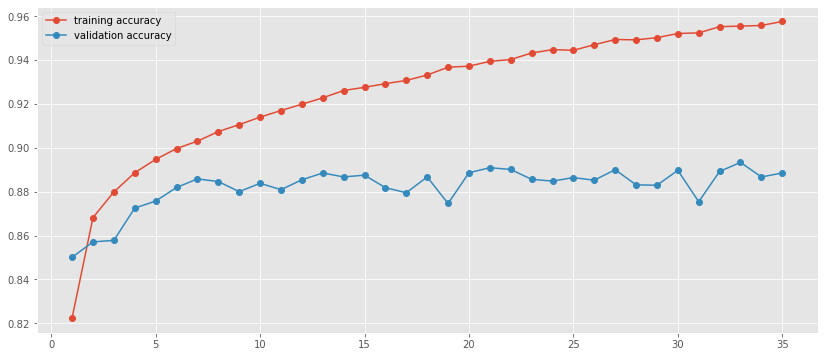

In [13]:
#training and validation accuracy as per the each ephoce
plt.figure(figsize=(14,6))
plt.plot(range(1,36),res.history['accuracy'],marker='o',label='training accuracy')
plt.plot(range(1,36),res.history['val_accuracy'],marker='o',label='validation accuracy')
plt.legend()
plt.show()

In [14]:
res.history

{'loss': [0.497616171836853,
  0.3627663850784302,
  0.32685232162475586,
  0.3022758662700653,
  0.2870623767375946,
  0.27075836062431335,
  0.26040011644363403,
  0.24863676726818085,
  0.2377678006887436,
  0.22778721153736115,
  0.22088448703289032,
  0.21205095946788788,
  0.20442484319210052,
  0.19795511662960052,
  0.19289462268352509,
  0.18679578602313995,
  0.1821514070034027,
  0.17663642764091492,
  0.1709061712026596,
  0.1662655621767044,
  0.16118142008781433,
  0.15824618935585022,
  0.15189580619335175,
  0.14794287085533142,
  0.14446300268173218,
  0.1396949291229248,
  0.13550323247909546,
  0.1339489072561264,
  0.13047191500663757,
  0.12720362842082977,
  0.1243065744638443,
  0.12001075595617294,
  0.11635683476924896,
  0.11587195098400116,
  0.11281342804431915],
 'accuracy': [0.8224499821662903,
  0.8681666851043701,
  0.8798666596412659,
  0.8885999917984009,
  0.8946666717529297,
  0.8996166586875916,
  0.902999997138977,
  0.9073500037193298,
  0.9105333

In [15]:
###################################################

In [16]:
test_img = X_train[175]  #choosing random number predict for our reference

In [17]:
test_img.shape

(784,)

In [18]:
img=test_img.reshape(1,-1)  #Flattening the image

In [19]:
img_test=test_img.reshape(28,28)  

In [20]:
img.shape

(1, 784)

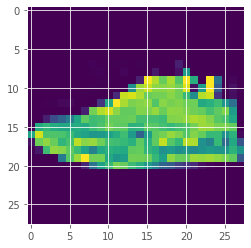

In [21]:
plt.imshow(img_test)

In [22]:
result = model.predict_classes(img) #Class name = 0
for res in result:
    print(Class_names[res], end = " ")

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Sneaker 

In [23]:
######################

# test my own Img

In [24]:
import cv2

In [25]:
img = cv2.imread('Test-img.jpg')
dimensions = img.shape

In [26]:
dimensions

(25, 25, 3)

In [27]:
img_test=img.reshape(28,28)  

ValueError: cannot reshape array of size 1875 into shape (28,28)

In [ ]:
img_2=img.reshape(1,-1)

In [ ]:
.shape

In [ ]:
plt.imshow(img)

In [ ]:
result = model.predict_classes(img) #Class name = 0
for res in result:
    print(Class_names[res], end = " ")